In [1]:
!nvidia-smi -L

GPU 0: Tesla K80 (UUID: GPU-590e201b-4f78-fe47-daf6-d571ca73c3a0)


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku 
import numpy as np

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt \
    -O /tmp/sonnets.txt

--2021-03-22 10:45:00--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sonnets.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.76.128, 66.102.1.128, 74.125.133.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.76.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93578 (91K) [text/plain]
Saving to: ‘/tmp/sonnets.txt’

/tmp/sonnets.txt    100%[===================>]  91.38K  --.-KB/s    in 0.001s  

2021-03-22 10:45:00 (70.8 MB/s) - ‘/tmp/sonnets.txt’ saved [93578/93578]



In [4]:
data = open('/tmp/sonnets.txt').read()
corpus = data.lower().split("\n")

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

In [5]:
model = Sequential()
model.add(Embedding(total_words, 128, input_length=max_sequence_len - 1))
model.add(Bidirectional(LSTM(120, return_sequences=True)))
model.add(Dropout(0.2))
model.add(LSTM(96))
model.add(Dense(total_words/2, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(total_words, activation='softmax'))


model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 128)           411008    
_________________________________________________________________
bidirectional (Bidirectional (None, 10, 240)           239040    
_________________________________________________________________
dropout (Dropout)            (None, 10, 240)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 96)                129408    
_________________________________________________________________
dense (Dense)                (None, 1605)              155685    
_________________________________________________________________
dense_1 (Dense)              (None, 3211)              5156866   
Total params: 6,092,007
Trainable params: 6,092,007
Non-trainable params: 0
______________________________________________

In [6]:
history = model.fit(predictors, label, epochs=100, verbose=1)

Epoch 1/100
484/484 [==============================] - 46s 25ms/step - loss: 7.3402 - accuracy: 0.0199
Epoch 2/100
484/484 [==============================] - 12s 26ms/step - loss: 6.5130 - accuracy: 0.0185
Epoch 3/100
484/484 [==============================] - 13s 26ms/step - loss: 6.3978 - accuracy: 0.0241
Epoch 4/100
484/484 [==============================] - 12s 26ms/step - loss: 6.2722 - accuracy: 0.0287
Epoch 5/100
484/484 [==============================] - 12s 26ms/step - loss: 6.1348 - accuracy: 0.0322
Epoch 6/100
484/484 [==============================] - 12s 26ms/step - loss: 6.0409 - accuracy: 0.0373
Epoch 7/100
484/484 [==============================] - 13s 26ms/step - loss: 5.9665 - accuracy: 0.0423
Epoch 8/100
484/484 [==============================] - 13s 26ms/step - loss: 5.8767 - accuracy: 0.0478
Epoch 9/100
484/484 [==============================] - 12s 26ms/step - loss: 5.7813 - accuracy: 0.0537
Epoch 10/100
484/484 [==============================] - 12s 25ms/step - l

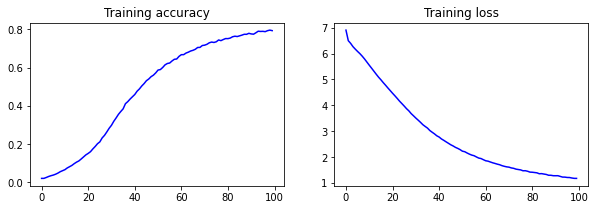

In [7]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.figure(figsize=(10,3))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')

plt.show()

In [10]:
seed_text = "I tried so hard and got so far but in the end nothing really matters"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word

print(seed_text)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


I tried so hard and got so far but in the end nothing really matters faith die stay there twain about stand down in pride of every brow clearer light light light mad cured decays brought new borrow'd back once prove in me bright hell new words possess'd in pleasure die bright young hence pain thee thee behind foes rare cheeks ' live still so bad doth bright ill short or store them words cured taken bred back up grew mind up decease after dead dwells faith torn behind mind green mind mind mind skill mind gain days had shine back doth days untrue dwell ' ill twain confounds forth shame words so belong twain
